<h2>If you are not using Google Collab, dont run the below 2 cells

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikeras

In [ ]:
!pip install pytorch_tabnet torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, LSTM, Conv1D ,Flatten, BatchNormalization,GRU, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import lightgbm as lgb
from pytorch_tabnet.tab_model import TabNetRegressor
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<h2>Loading and Preparing data</h2>

If not using google colab use <code>df = pd.read_csv("../csv_files/dat-merged.csv", delimiter=',')</code>

In [ ]:
#CHANGE line if not using GOOGLE COLLAB, USE the above mentioned line
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ISTE main project/csv_files/dat-merged.csv", delimiter=',')

In [ ]:
df.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"12.839522, 74.854944",2022-07-01,26.0,23.0,24.5,26.0,23.0,24.5,23.4,93.3,...,6.5,3.0,30.0,2022-07-01T06:08:23,2022-07-01T19:00:30,0.07,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"VOML,43284099999,43285099999"
1,"12.839522, 74.854944",2022-07-02,29.0,24.0,26.1,33.6,24.0,27.2,24.1,88.9,...,14.7,6.0,30.0,2022-07-02T06:08:39,2022-07-02T19:00:36,0.11,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"VOML,43284099999,remote,43285099999"
2,"12.839522, 74.854944",2022-07-03,29.0,23.9,26.3,34.5,23.9,28.3,23.8,86.7,...,13.5,6.0,30.0,2022-07-03T06:08:55,2022-07-03T19:00:42,0.14,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"VOML,43284099999,43285099999"
3,"12.839522, 74.854944",2022-07-04,26.4,23.8,24.6,26.4,23.8,24.6,23.3,92.4,...,3.1,1.0,10.0,2022-07-04T06:09:12,2022-07-04T19:00:47,0.18,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"VOML,43284099999,remote,43285099999"
4,"12.839522, 74.854944",2022-07-05,25.6,23.0,24.2,25.6,23.0,24.2,23.1,93.6,...,3.5,1.0,30.0,2022-07-05T06:09:28,2022-07-05T19:00:52,0.21,"Rain, Overcast",Cloudy skies throughout the day with rain in t...,rain,"VOML,43284099999,43285099999"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8220 entries, 0 to 8219
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              8220 non-null   object 
 1   datetime          8220 non-null   object 
 2   tempmax           8220 non-null   float64
 3   tempmin           8220 non-null   float64
 4   temp              8220 non-null   float64
 5   feelslikemax      8220 non-null   float64
 6   feelslikemin      8220 non-null   float64
 7   feelslike         8220 non-null   float64
 8   dew               8220 non-null   float64
 9   humidity          8220 non-null   float64
 10  precip            8220 non-null   float64
 11  precipprob        8220 non-null   int64  
 12  precipcover       8220 non-null   float64
 13  preciptype        4142 non-null   object 
 14  snow              3653 non-null   float64
 15  snowdepth         3653 non-null   float64
 16  windgust          3653 non-null   float64


<h3>Removing unwanted columns</h3>
We are removing the columns that have insufficient data which cannot be compensated by the <code>fillna()</code> method since there is a large number of rows with NaN values

In [ ]:
df.drop(['name','preciptype','snow','snowdepth','windgust','severerisk','sunrise','sunset','moonphase','icon','stations','conditions','description'], axis=1, inplace=True)

In [ ]:
df1=df.iloc[:5479]
df1.set_index('datetime',inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5479 entries, 2022-07-01 to 2012-06-30
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           5479 non-null   float64
 1   tempmin           5479 non-null   float64
 2   temp              5479 non-null   float64
 3   feelslikemax      5479 non-null   float64
 4   feelslikemin      5479 non-null   float64
 5   feelslike         5479 non-null   float64
 6   dew               5479 non-null   float64
 7   humidity          5479 non-null   float64
 8   precip            5479 non-null   float64
 9   precipprob        5479 non-null   int64  
 10  precipcover       5479 non-null   float64
 11  windspeed         5479 non-null   float64
 12  winddir           5479 non-null   float64
 13  sealevelpressure  5475 non-null   float64
 14  cloudcover        5479 non-null   float64
 15  visibility        5475 non-null   float64
 16  solarradiation    5479 non-null 

<h3>Checking for missing values in the given columns:

In [ ]:
print("\nMissing Values:")
df1.isnull().sum()


Missing Values:


,0
tempmax,0
tempmin,0
temp,0
feelslikemax,0
feelslikemin,0
feelslike,0
dew,0
humidity,0
precip,0
precipprob,0


<h3>Filling and Dropping columns with NaN values

In [ ]:
df1['visibility'].fillna(4,inplace=True)
df1['sealevelpressure'].fillna(method='ffill',inplace=True)

In [ ]:
df1.dropna(subset=['solarradiation','solarenergy'],inplace=True)

In [ ]:
df1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
tempmax,5479.0,31.37,2.34,24.0,29.7,32.00,33.1,37.9
tempmin,5479.0,24.05,1.50,18.4,23.1,24.00,25.0,28.8
temp,5479.0,27.24,1.45,22.3,26.2,27.10,28.3,31.3
feelslikemax,5479.0,35.57,3.47,24.0,33.5,35.50,37.9,45.9
feelslikemin,5479.0,24.24,2.04,18.4,23.1,24.00,25.0,34.7
feelslike,5479.0,29.22,2.84,22.3,27.2,28.70,31.0,38.5
dew,5479.0,22.74,2.03,12.6,21.9,23.40,24.1,26.2
humidity,5479.0,78.05,9.53,47.1,70.7,78.00,86.2,98.7
precip,5479.0,9.70,21.99,0.0,0.0,0.10,8.0,283.0
precipprob,5479.0,53.02,49.91,0.0,0.0,100.00,100.0,100.0


<h2>Visualization of the Data

<h2>Analysis of our Target variable

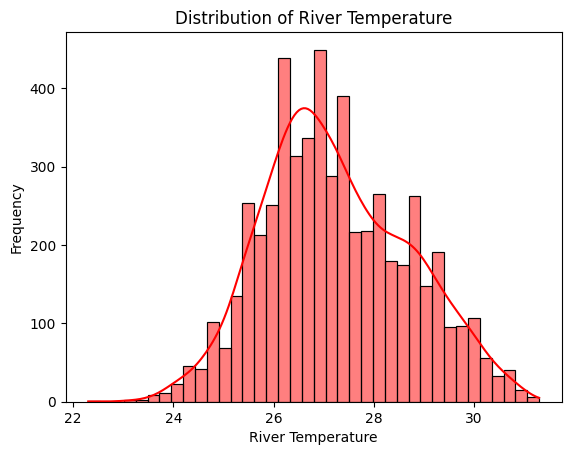

In [ ]:
sns.histplot(df1['temp'],kde=True,color='red')
plt.title('Distribution of River Temperature')
plt.xlabel('River Temperature')
plt.ylabel('Frequency')
plt.show()

<h3>Plotting the Correlation matrix

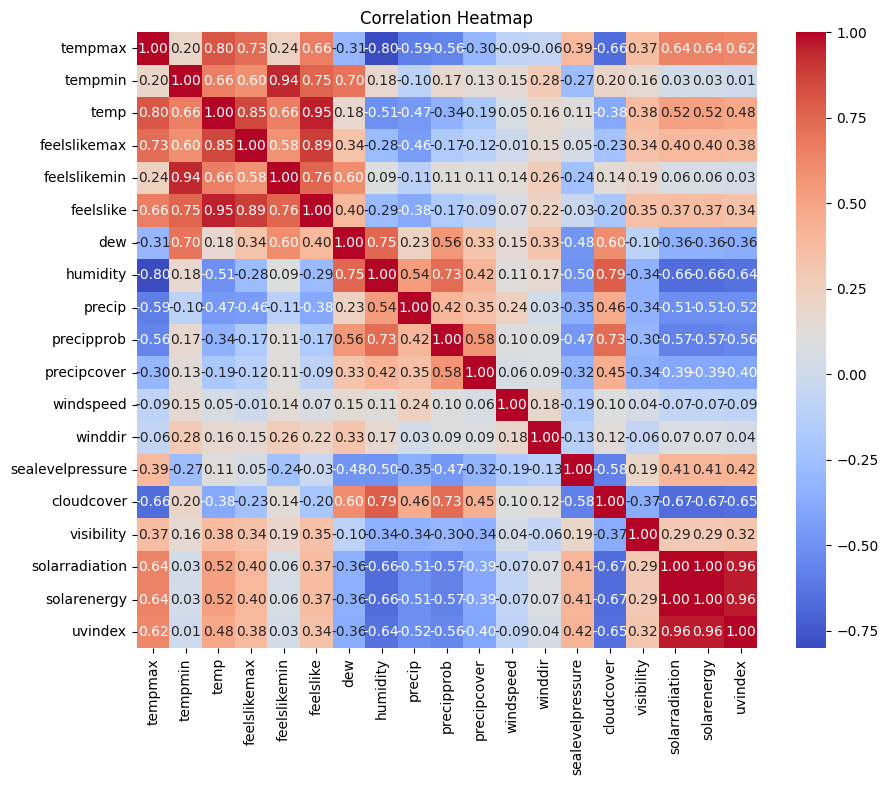

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h3>Inspecting the correlation between the target column and other columns</h3>

In [ ]:
target_corr = df1.corr()['temp'].sort_values(ascending=False)
print(target_corr)

temp                1.000000
feelslike           0.951391
feelslikemax        0.852256
tempmax             0.803409
tempmin             0.656658
feelslikemin        0.655972
solarradiation      0.517958
solarenergy         0.517650
uvindex             0.482613
visibility          0.376346
dew                 0.175211
winddir             0.163667
sealevelpressure    0.109779
windspeed           0.050848
precipcover        -0.190077
precipprob         -0.341082
cloudcover         -0.380944
precip             -0.467286
humidity           -0.508292
Name: temp, dtype: float64


<h2>Final Analysis:</h2>
->feelslike, feelslikemax, feelslikemin are all the same as tempmax and tempmin so we will drop these columns<br>
->solarradiation, solarenergy and uvindex are all highly related and mostly derived from each other, so we will only keep solarenergy.<br>
->Features like windspeed,visibility,dew,sealevelpressure have very weak realtions with temp, so we are going to drop these columns.<br>
->So therefore we will keep the columns on the basis of the correlation values - 'tempmax, tempmin, solarradiation, humidity, precip, cloudcover, precipprob '

In [ ]:
#Including 'temp' for visulaization purpose
features1=['temp','tempmax', 'tempmin', 'solarradiation', 'humidity', 'precip', 'cloudcover']
f = df1[features1]

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

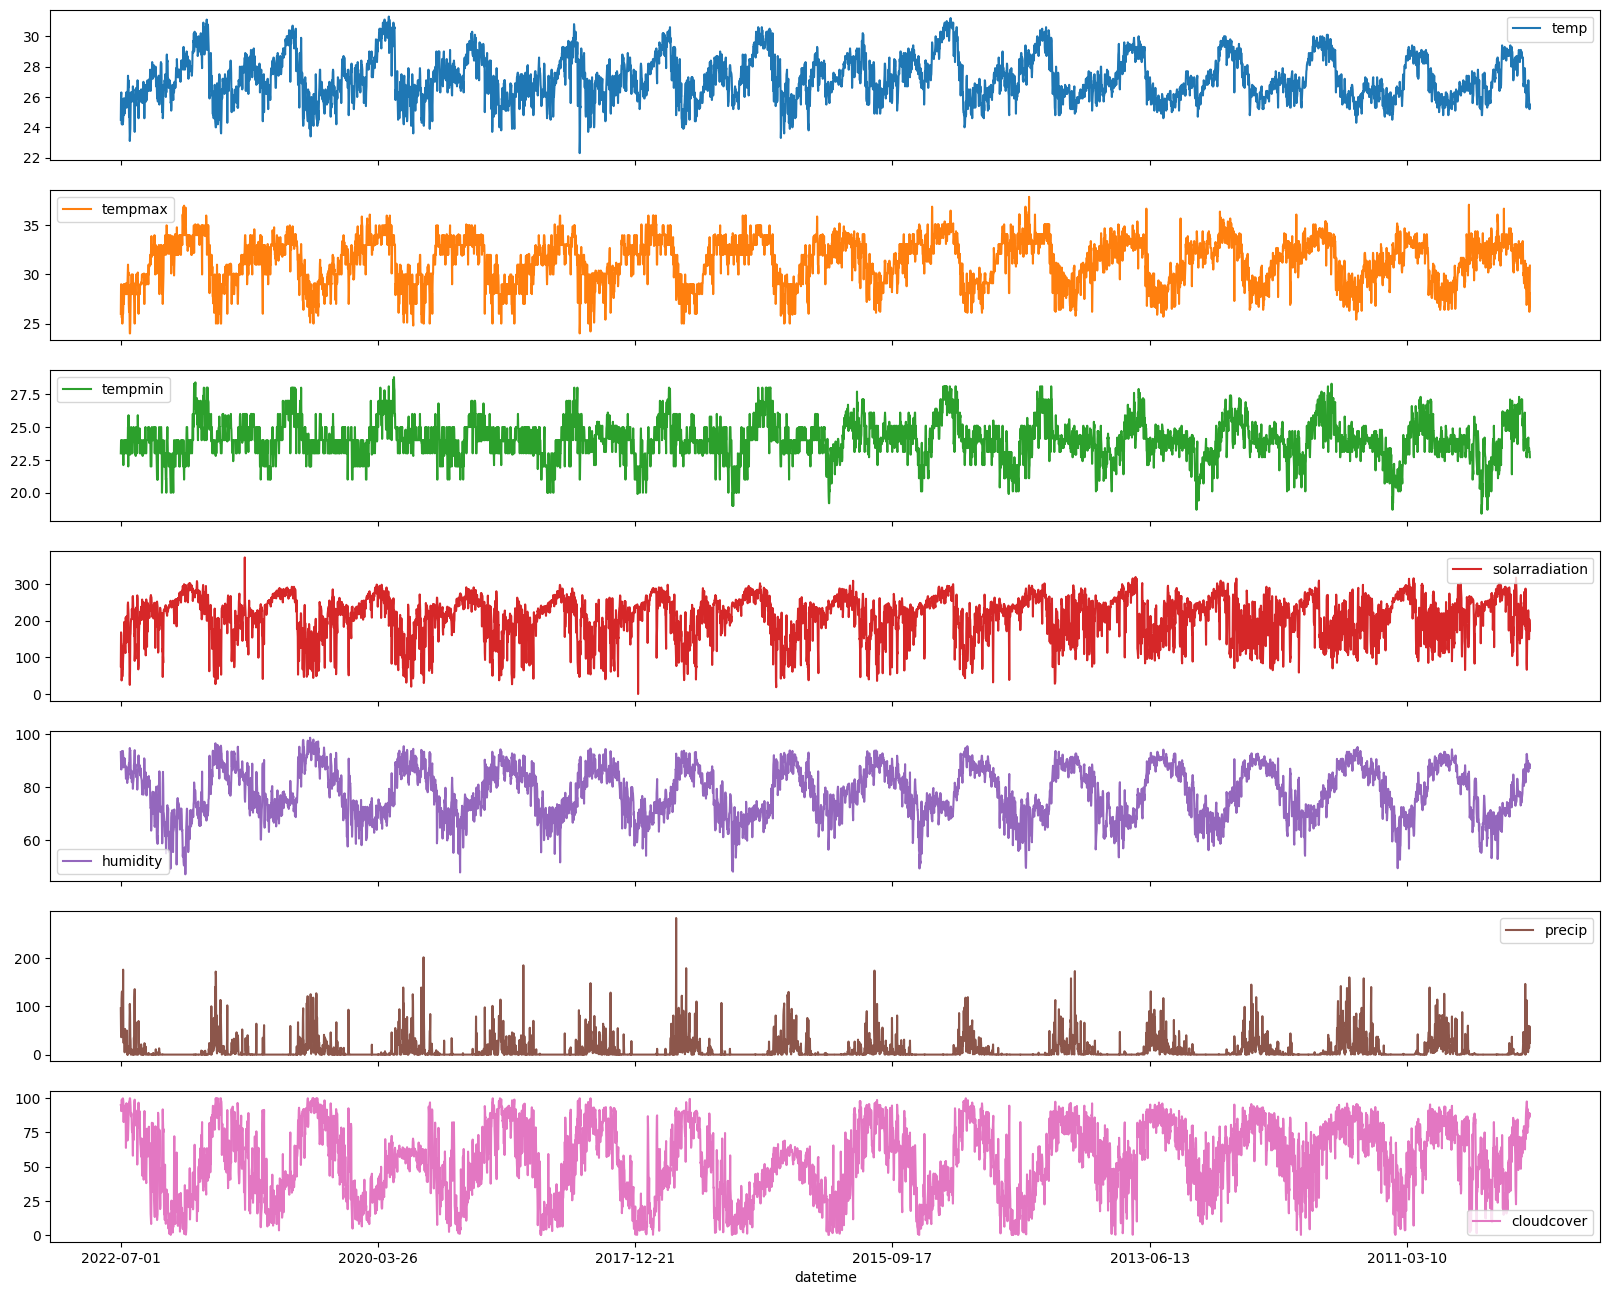

In [ ]:
f.plot(subplots=True, figsize=(20,16))

<h2>Plots of different 'features' against 'temp'

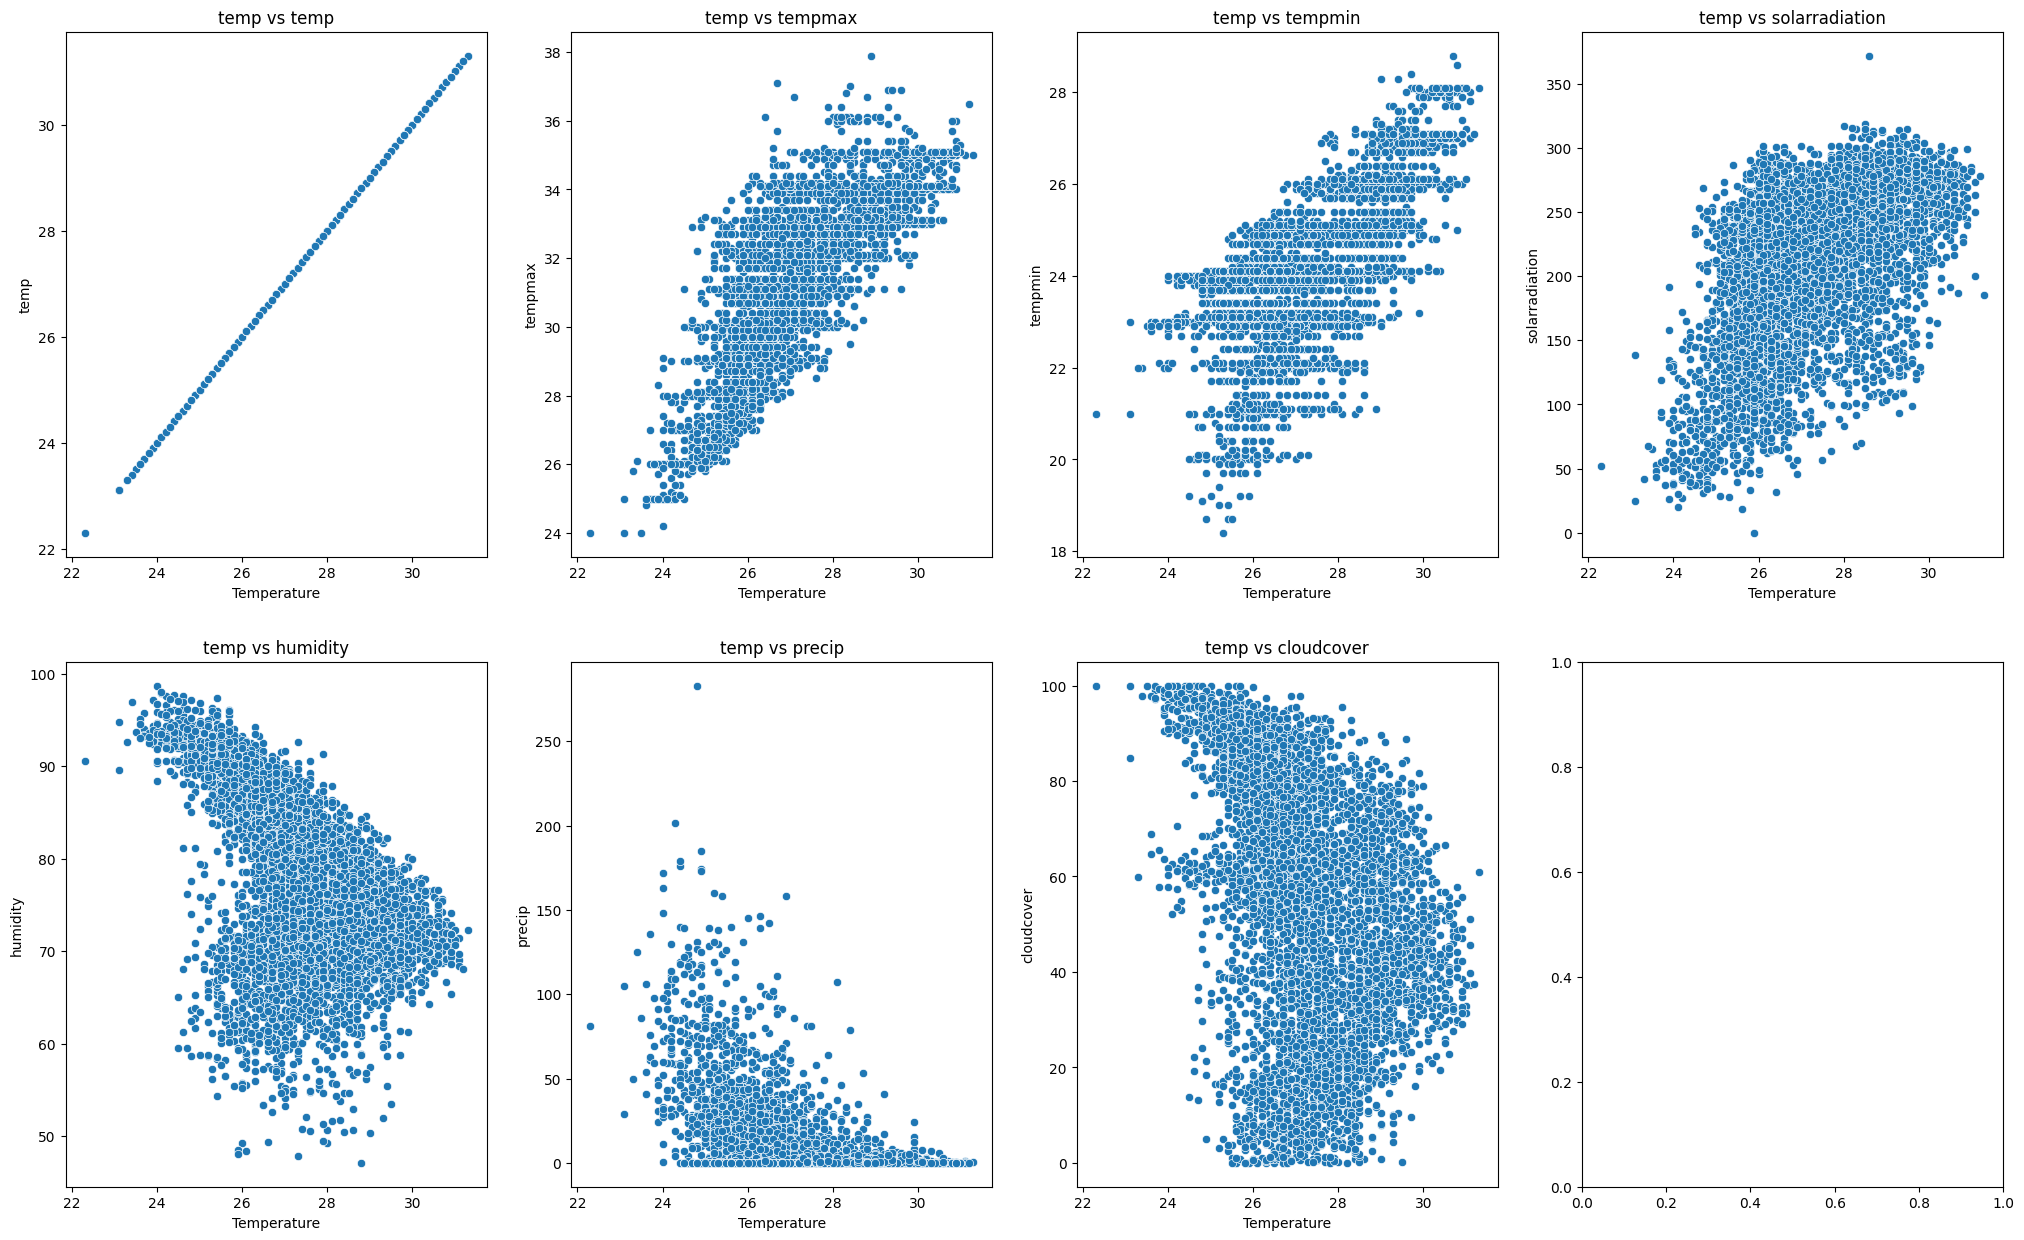

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 15))
axes = axes.flatten()

for i, feature in enumerate(features1):
    sns.scatterplot(x=df1['temp'], y=df1[feature], ax=axes[i])
    axes[i].set_title(f'temp vs {feature}')
    axes[i].set_xlabel('Temperature')
    axes[i].set_ylabel(feature)

<h2>Deep Learning Models

In [ ]:
print("\nPreparing data for deep learning models...")
features = ['tempmax', 'tempmin', 'solarradiation', 'humidity', 'precip', 'cloudcover', 'precipprob']
X = df1
y = df1['temp']


Preparing data for deep learning models...


<h3>Normalization

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Checking if any of the rows in the dataframe has NaN values again

In [ ]:
# Check for null values in X_train and X_test
print("Null values in X_train:", np.isnan(X_train).any())
print("Null values in X_test:", np.isnan(X_test).any())
print("Null values in X_train:", np.isnan(y_train).any())
print("Null values in X_test:", np.isnan(y_test).any())

# To see the total number of null values in each:
print("Total null values in X_train:", np.isnan(X_train).sum())
print("Total null values in X_test:", np.isnan(X_test).sum())
print("Null values in X_train:", np.isnan(y_train).sum())
print("Null values in X_test:", np.isnan(y_test).sum())

Null values in X_train: False
Null values in X_test: False
Null values in X_train: False
Null values in X_test: False
Total null values in X_train: 0
Total null values in X_test: 0
Null values in X_train: 0
Null values in X_test: 0


<h1> Defining Different Model Architectures

In [ ]:
#4 layer ANN
def create_dense_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=input_shape), #layer1
        Dropout(0.2),
        Dense(32, activation='relu'),#layer2
        Dropout(0.2),
        Dense(16, activation='relu'),#layer3
        Dense(1) #layer4
    ])
    return model

In [ ]:
#5 layer AdNN
def create_deep_dense_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape), #layer1
        Dropout(0.3),
        Dense(64, activation='relu'),#layer2
        Dropout(0.2),
        Dense(32, activation='relu'),#layer3
        Dropout(0.2),
        Dense(16, activation='relu'),#layer4
        Dense(1)#layer5
    ])
    return model

In [ ]:
def create_lstm_model(input_shape):
    # Reshape input for LSTM
    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential([
        LSTM(64, input_shape=(1, input_shape[0])),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model, X_train_reshaped, X_test_reshaped

In [ ]:
def create_gru_model(input_shape):
    model = Sequential([
        GRU(64, input_shape=(1, input_shape[0])),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    return model

In [ ]:
def create_xgboost_model():
    """Create XGBoost model architecture"""
    model = xgb.XGBRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=5,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        early_stopping_rounds=20
    )
    return model


In [ ]:
def create_lightgbm_model():
    """Create LightGBM model architecture"""
    params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'feature_fraction': 0.9,
        'n_estimators': 1000,
        'early_stopping_rounds': 20
    }
    model = lgb.LGBMRegressor(**params)
    return model


In [ ]:
def create_bilstm_model(input_shape):
    """Create Bidirectional LSTM model architecture"""
    # Reshape input for LSTM
    X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential([
        Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, input_shape[0])),
        Bidirectional(LSTM(32)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    return model, X_train_reshaped, X_test_reshaped


In [ ]:
def create_tabnet_model():
    """Create TabNet model architecture"""
    model = TabNetRegressor(
        n_d=8,  # Width of the decision prediction layer
        n_a=8,  # Width of the attention embedding for each mask
        n_steps=3,  # Number of steps in the architecture
        gamma=1.3,  # This is the coefficient for feature reusage
        n_independent=2,  # Number of independent GLU layers
        n_shared=2,  # Number of shared GLU layers
        lambda_sparse=1e-3,  # Sparsity regularization
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=2e-2),
        scheduler_params=dict(
            mode="min",
            patience=10,
            min_lr=1e-5,
            factor=0.5,
        ),
        scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
        mask_type='entmax',
        verbose=1
    )
    return model


In [ ]:
# Training and evaluation function
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) #If after 10 epochs, no significant imporvement found, training will stop

    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',
                 metrics=['mae'])

    history = model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2, #Performing Cross validation spiltting in the Train dataset
                       callbacks=[early_stopping],
                       verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n{model_name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    return history, y_pred

<h3>Training Different Models


Training Simple Dense Model...
Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 503.1160 - mae: 21.3202 - val_loss: 55.2350 - val_mae: 6.2703
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 55.6533 - mae: 6.0483 - val_loss: 18.3288 - val_mae: 3.4063
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 31.8858 - mae: 4.5200 - val_loss: 12.6855 - val_mae: 2.8495
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 26.0579 - mae: 4.1002 - val_loss: 9.3087 - val_mae: 2.4429
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 22.5973 - mae: 3.7655 - val_loss: 6.2297 - val_mae: 1.9794
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 19.9086 - mae: 3.5662 - val_loss: 4.9296 - val_mae: 1.7837
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 17.3201 - mae: 3.2898 - val_loss: 3.5809 - val_mae: 1.5074
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 15.6474 - mae: 3.1612 - val_loss: 3.8735 - val_mae: 1.59

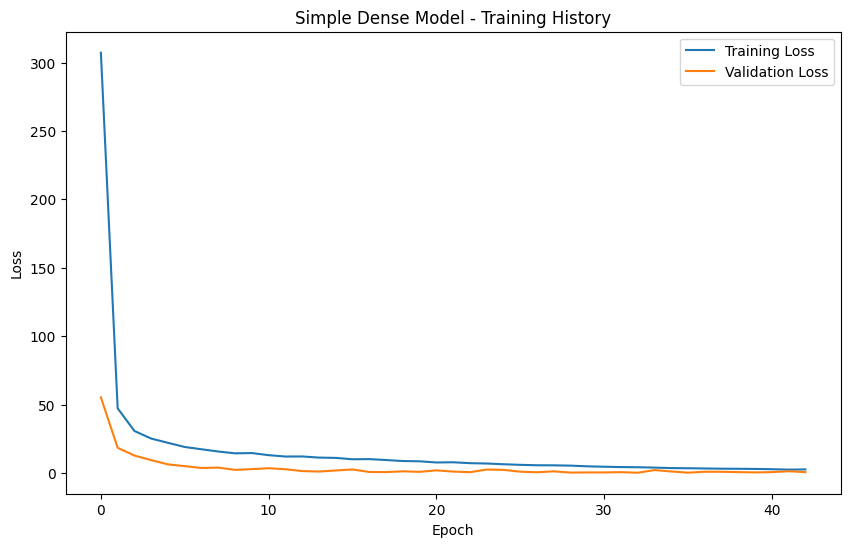

In [ ]:
print("\nTraining Simple Dense Model...")
dense_model = create_dense_model((X_train.shape[1],))
dense_history, dense_pred = train_and_evaluate_model(dense_model, X_train, X_test, y_train, y_test, "Simple Dense Model")


Training Deep Dense Model...
Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 532.6183 - mae: 21.6427 - val_loss: 28.2096 - val_mae: 4.3613
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 49.8904 - mae: 5.5792 - val_loss: 16.5927 - val_mae: 3.2765
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 31.7789 - mae: 4.4892 - val_loss: 7.8982 - val_mae: 2.2269
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 28.4125 - mae: 4.2613 - val_loss: 9.4155 - val_mae: 2.5454
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 23.2925 - mae: 3.8136 - val_loss: 4.9295 - val_mae: 1.7735
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20.1242 - mae: 3.5892 - val_loss: 10.2327 - val_mae: 2.8483
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.0086 - mae: 3.4827 - val_loss: 5.8322 - val_mae: 2.0022
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.9505 - mae: 3.2642 - val_loss: 8.7897 - val_mae: 2.7090
Epoc

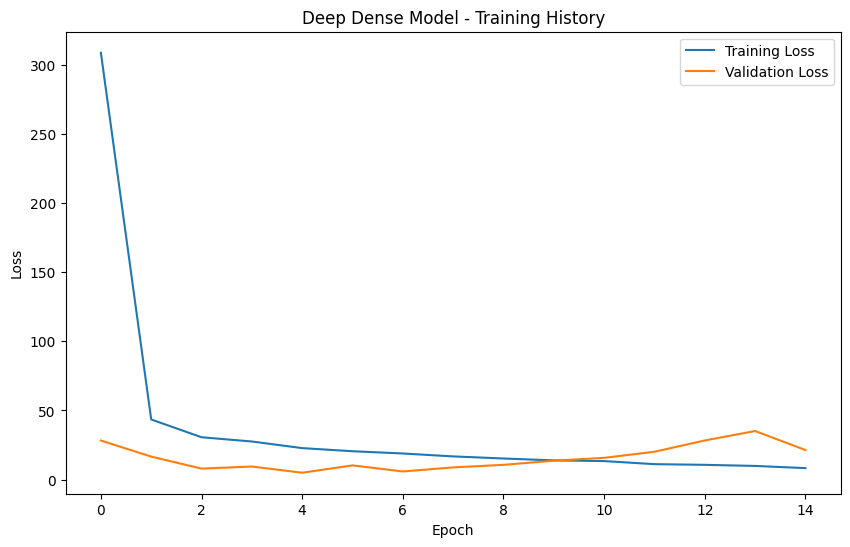

In [ ]:
print("\nTraining Deep Dense Model...")
deep_dense_model = create_deep_dense_model((X_train.shape[1],))
deep_dense_history, deep_dense_pred = train_and_evaluate_model(deep_dense_model, X_train, X_test, y_train, y_test, "Deep Dense Model")


Training LSTM Model...
Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 704.6151 - mae: 26.4825 - val_loss: 388.4439 - val_mae: 19.3794
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 249.1518 - mae: 14.3244 - val_loss: 43.1197 - val_mae: 5.1717
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 40.3460 - mae: 5.0225 - val_loss: 17.9573 - val_mae: 3.0740
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 21.8040 - mae: 3.6156 - val_loss: 10.3317 - val_mae: 2.2016
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16.6124 - mae: 3.0807 - val_loss: 6.6849 - val_mae: 1.7085
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13.2695 - mae: 2.7954 - val_loss: 4.9419 - val_mae: 1.4374
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 10.5516 - mae: 2.5407 - val_loss: 3.7078 - val_mae: 1.2357
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.5503 - mae: 2.4391 - val_loss: 3.0878 - val_mae: 1.1413
Epoch 

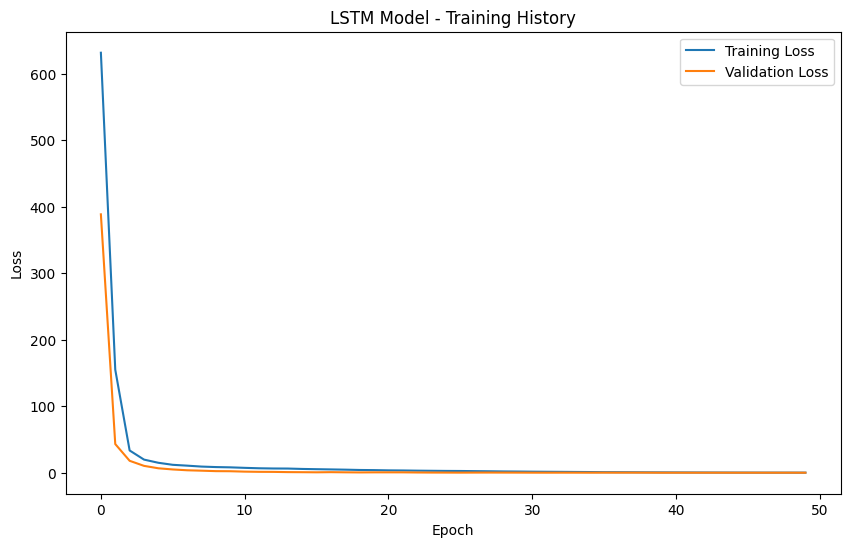

In [ ]:
print("\nTraining LSTM Model...")
lstm_model, X_train_lstm, X_test_lstm = create_lstm_model((X_train.shape[1],))
lstm_history, lstm_pred = train_and_evaluate_model(lstm_model, X_train_lstm, X_test_lstm, y_train, y_test, "LSTM Model")


Training GRU Model...
Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 689.4963 - mae: 26.1590 - val_loss: 314.5848 - val_mae: 17.3914
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 189.2360 - mae: 12.2195 - val_loss: 37.9824 - val_mae: 4.4383
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 36.6533 - mae: 4.5392 - val_loss: 13.6298 - val_mae: 2.4747
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13.9582 - mae: 2.8667 - val_loss: 5.9966 - val_mae: 1.4806
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 9.5572 - mae: 2.4109 - val_loss: 3.6573 - val_mae: 1.1282
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.7847 - mae: 2.1661 - val_loss: 2.4004 - val_mae: 0.9311
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7780 - mae: 2.0449 - val_loss: 1.6651 - val_mae: 0.8212
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.4419 - mae: 1.9743 - val_loss: 1.3151 - val_mae: 0.7164
Epoch 9/100


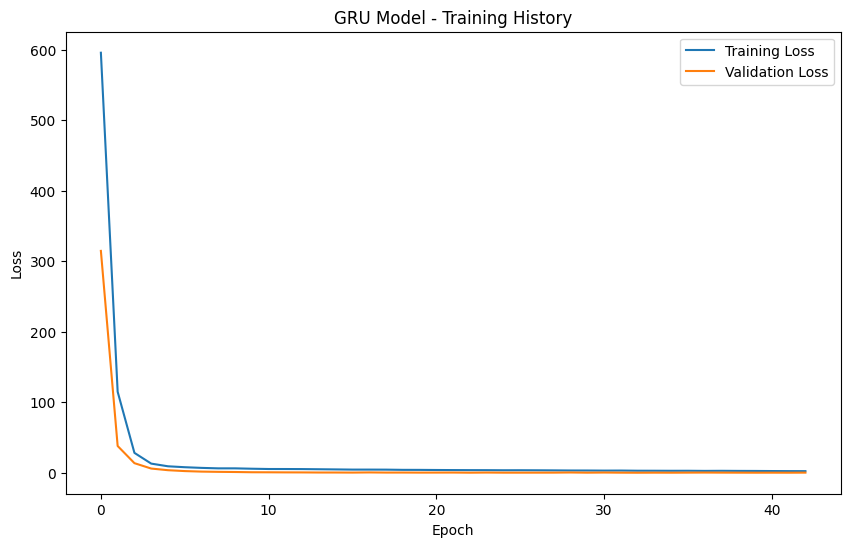

In [ ]:
print("\nTraining GRU Model...")
gru_model = create_gru_model((X_train.shape[1],))
gru_history, gru_pred = train_and_evaluate_model(gru_model, X_train.reshape(-1, 1, X_train.shape[1]),
                                                 X_test.reshape(-1, 1, X_test.shape[1]), y_train, y_test, "GRU Model")


Training BiLSTM Model...
Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 623.0477 - mae: 24.2079 - val_loss: 43.7047 - val_mae: 4.6219
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 32.3538 - mae: 4.0824 - val_loss: 8.0566 - val_mae: 1.6361
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 10.3364 - mae: 2.3794 - val_loss: 3.0313 - val_mae: 1.0713
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.4361 - mae: 2.0869 - val_loss: 1.9029 - val_mae: 0.8809
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4918 - mae: 1.8312 - val_loss: 1.7172 - val_mae: 0.9589
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.1061 - mae: 1.7597 - val_loss: 0.9686 - val_mae: 0.6821
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.2691 - mae: 1.6668 - val_loss: 1.0871 - val_mae: 0.8328
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.1083 - mae: 1.6022 - val_loss: 0.9975 - val_mae: 0.8419
Epoch 9/100
1

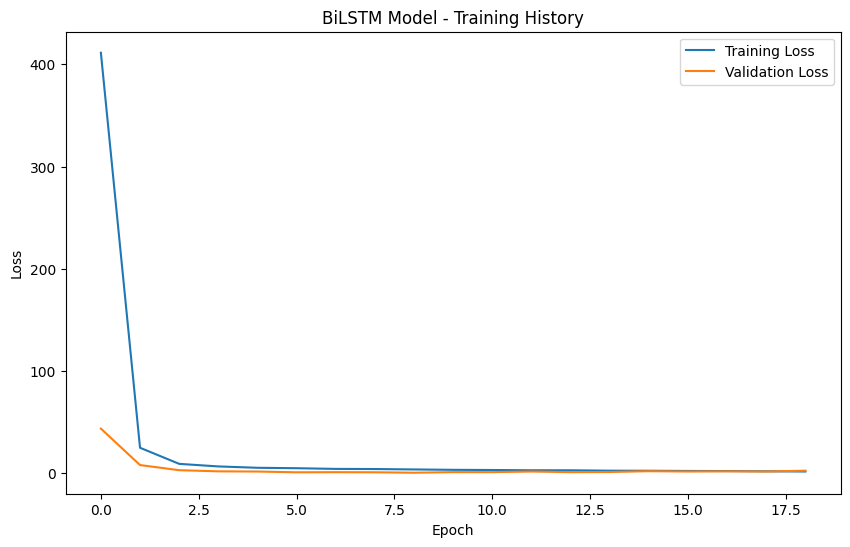

In [ ]:
print("\nTraining BiLSTM Model...")
bilstm_model, X_train_bilstm, X_test_bilstm = create_bilstm_model((X_train.shape[1],))
bilstm_history, bilstm_pred = train_and_evaluate_model(bilstm_model, X_train_bilstm, X_test_bilstm, y_train, y_test, "BiLSTM Model")

In [ ]:
print("\nTraining TabNet Model...")
tabnet_model = create_tabnet_model()

y_train_2d = y_train.values.reshape(-1, 1)  # Reshape y_train
y_test_2d = y_test.values.reshape(-1, 1)

tabnet_model.fit(
    X_train, y_train_2d,
    eval_set=[(X_test, y_test_2d)],
    max_epochs=100,
    patience=20,
    batch_size=256,
    eval_metric=['mae']
)


Training TabNet Model...
epoch 0  | loss: 571.34842| val_0_mae: 15.66474|  0:00:00s
epoch 1  | loss: 181.26542| val_0_mae: 6.34163 |  0:00:01s
epoch 2  | loss: 8.69375 | val_0_mae: 4.78922 |  0:00:01s
epoch 3  | loss: 1.5955  | val_0_mae: 3.06006 |  0:00:02s
epoch 4  | loss: 0.84041 | val_0_mae: 2.41762 |  0:00:02s
epoch 5  | loss: 0.61914 | val_0_mae: 1.97899 |  0:00:03s
epoch 6  | loss: 0.6325  | val_0_mae: 1.42504 |  0:00:03s
epoch 7  | loss: 0.49924 | val_0_mae: 1.50711 |  0:00:04s
epoch 8  | loss: 0.39025 | val_0_mae: 1.2139  |  0:00:04s
epoch 9  | loss: 0.52587 | val_0_mae: 1.26762 |  0:00:05s
epoch 10 | loss: 0.38847 | val_0_mae: 1.26573 |  0:00:06s
epoch 11 | loss: 0.26801 | val_0_mae: 1.22812 |  0:00:06s
epoch 12 | loss: 0.30023 | val_0_mae: 0.54343 |  0:00:07s
epoch 13 | loss: 0.20115 | val_0_mae: 0.57208 |  0:00:07s
epoch 14 | loss: 0.24362 | val_0_mae: 0.74617 |  0:00:08s
epoch 15 | loss: 0.27564 | val_0_mae: 0.47536 |  0:00:09s
epoch 16 | loss: 0.16924 | val_0_mae: 0.3329

In [ ]:
tabnet_history = {
    'loss': tabnet_model.history['loss']
}
tabnet_pred = tabnet_model.predict(X_test)

In [ ]:
print("\nTraining XGBoost Model...")
xgb_model = create_xgboost_model()
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)
xgb_pred = xgb_model.predict(X_test)
xgb_history = {
    'loss': xgb_model.evals_result()['validation_0']['rmse'],
    'val_loss': xgb_model.evals_result()['validation_1']['rmse']
}


Training XGBoost Model...


In [ ]:
print("\nTraining LightGBM Model...")
lgb_model = create_lightgbm_model()
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse'
)
lgb_pred = lgb_model.predict(X_test)
lgb_history = {
    'loss': lgb_model.evals_result_['valid_0']['rmse'],
    'val_loss': lgb_model.evals_result_['valid_0']['rmse']
}


Training LightGBM Model...
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2532
[LightGBM] [Info] Number of data points in the train set: 4383, number of used features: 19
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: earl

<h2>RMSE comparison

In [ ]:
models_rmse = {
    'Simple Dense': np.sqrt(mean_squared_error(y_test, dense_pred)),
    'Deep Dense': np.sqrt(mean_squared_error(y_test, deep_dense_pred)),
    'LSTM': np.sqrt(mean_squared_error(y_test, lstm_pred)),
    'BiLSTM': np.sqrt(mean_squared_error(y_test, bilstm_pred)),
    'TabNet': np.sqrt(mean_squared_error(y_test, tabnet_pred)),
    'XGBoost': np.sqrt(mean_squared_error(y_test, xgb_pred)),
    'LightGBM': np.sqrt(mean_squared_error(y_test, lgb_pred)),
    'GRU': np.sqrt(mean_squared_error(y_test, gru_pred))
}

print("\nModel Comparison (RMSE):")
for model_name, rmse in models_rmse.items():
    print(f"{model_name}: {rmse:.4f}")


Model Comparison (RMSE):
Simple Dense: 0.3895
Deep Dense: 2.5160
LSTM: 0.1720
BiLSTM: 0.6939
TabNet: 0.0453
XGBoost: 0.0201
LightGBM: 0.0219
GRU: 0.2862


<h2>R2 scores Evaluation for the models

In [ ]:
r2_scores = {
    'Simple Dense': {'Train R²': r2_score(y_train, dense_model.predict(X_train)),
                     'Test R²': r2_score(y_test, dense_pred)},

    'Deep Dense': {'Train R²': r2_score(y_train, deep_dense_model.predict(X_train)),
                   'Test R²': r2_score(y_test, deep_dense_pred)},

    'LSTM': {'Train R²': r2_score(y_train, lstm_model.predict(X_train.reshape(-1, 1, X_train.shape[1]))),
             'Test R²': r2_score(y_test, lstm_pred)},

    'GRU': {'Train R²': r2_score(y_train, gru_model.predict(X_train.reshape(-1, 1, X_train.shape[1]))),
            'Test R²': r2_score(y_test, gru_pred)},

    'BiLSTM': {'Train R²': r2_score(y_train, bilstm_model.predict(X_train_bilstm)),
               'Test R²': r2_score(y_test, bilstm_pred)},

    'TabNet': {'Train R²': r2_score(y_train, tabnet_model.predict(X_train)),
               'Test R²': r2_score(y_test, tabnet_pred)},

    'XGBoost': {'Train R²': r2_score(y_train, xgb_model.predict(X_train)),
                'Test R²': r2_score(y_test, xgb_pred)},

    'LightGBM': {'Train R²': r2_score(y_train, lgb_model.predict(X_train)),
                 'Test R²': r2_score(y_test, lgb_pred)}
}

r2_df = pd.DataFrame.from_dict(r2_scores, orient='index')

print("\nModel Train & Test R² Scores:")
print(r2_df)


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9

Model Train & Test R² Scores:
              Train R²   Test R²
Simple Dense  0.941806  0.925560
Deep Dense   -1.511685 -2.105924
LSTM          0.986354  0.985486
GRU           0.965202  0.959808
BiLSTM        0.772003  0.763789
TabNet        0.999007  0.998994
XGBoost       0.999887  0.999802
LightGBM      0.999780  0.999764


<h2>Checking an Ensembled Prediction

In [ ]:
ensemble_pred = 0.5 * xgb_pred + 0.3 * lgb_pred + 0.2 * tabnet_pred.ravel()

# Calculation of metrics for the ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_pred)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print("\nEnsemble Model Performance:")
print(f"RMSE: {ensemble_rmse:.4f}")
print(f"R² Score on test set: {ensemble_r2:.4f}")


Ensemble Model Performance:
RMSE: 0.0188
R² Score on test set: 0.9998


In [ ]:
r2_df = pd.DataFrame({
    'Simple Dense': r2_score(y_test, dense_pred),
    'Deep Dense': r2_score(y_test, deep_dense_pred),
    'LSTM': r2_score(y_test, lstm_pred),
    'GRU': r2_score(y_test, gru_pred),
    'BiLSTM': r2_score(y_test, bilstm_pred),
    'TabNet': r2_score(y_test, tabnet_pred),
    'XGBoost': r2_score(y_test, xgb_pred),
    'LightGBM': r2_score(y_test, lgb_pred),
    'Weighted Ensemble': ensemble_r2
}, index=[0])

# Sort and display final results
r2_df = r2_df.T.sort_values(by=0,ascending=False)
print("\nFinal Model Rankings (R² Score):")
print(r2_df)


Final Model Rankings (R² Score):
                          0
Weighted Ensemble  0.999826
XGBoost            0.999802
LightGBM           0.999764
TabNet             0.998994
LSTM               0.985486
GRU                0.959808
Simple Dense       0.925560
BiLSTM             0.763789
Deep Dense        -2.105924


<h2>Comparison

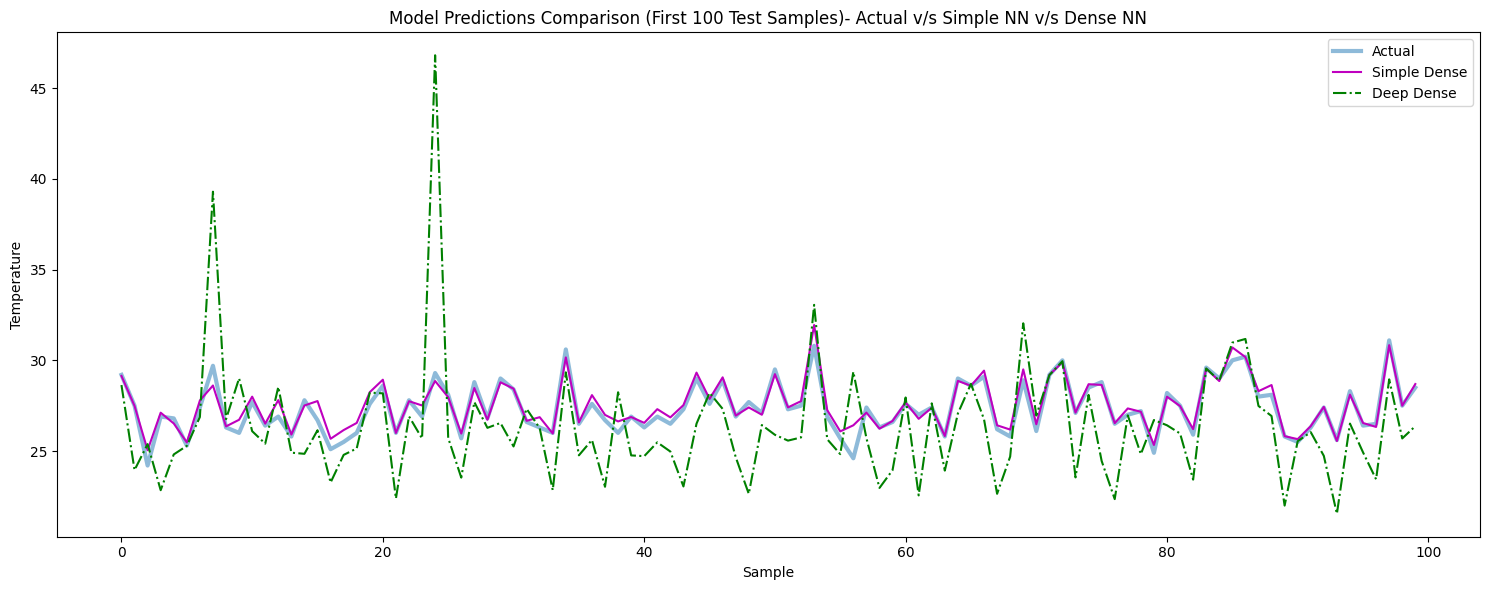

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Actual',linewidth=3,alpha=0.5)
plt.plot(dense_pred[:100], label='Simple Dense',c='m')
plt.plot(deep_dense_pred[:100], label='Deep Dense',linestyle='-.',c='g')
plt.title('Model Predictions Comparison (First 100 Test Samples)- Actual v/s Simple NN v/s Dense NN')
plt.xlabel('Sample')
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()

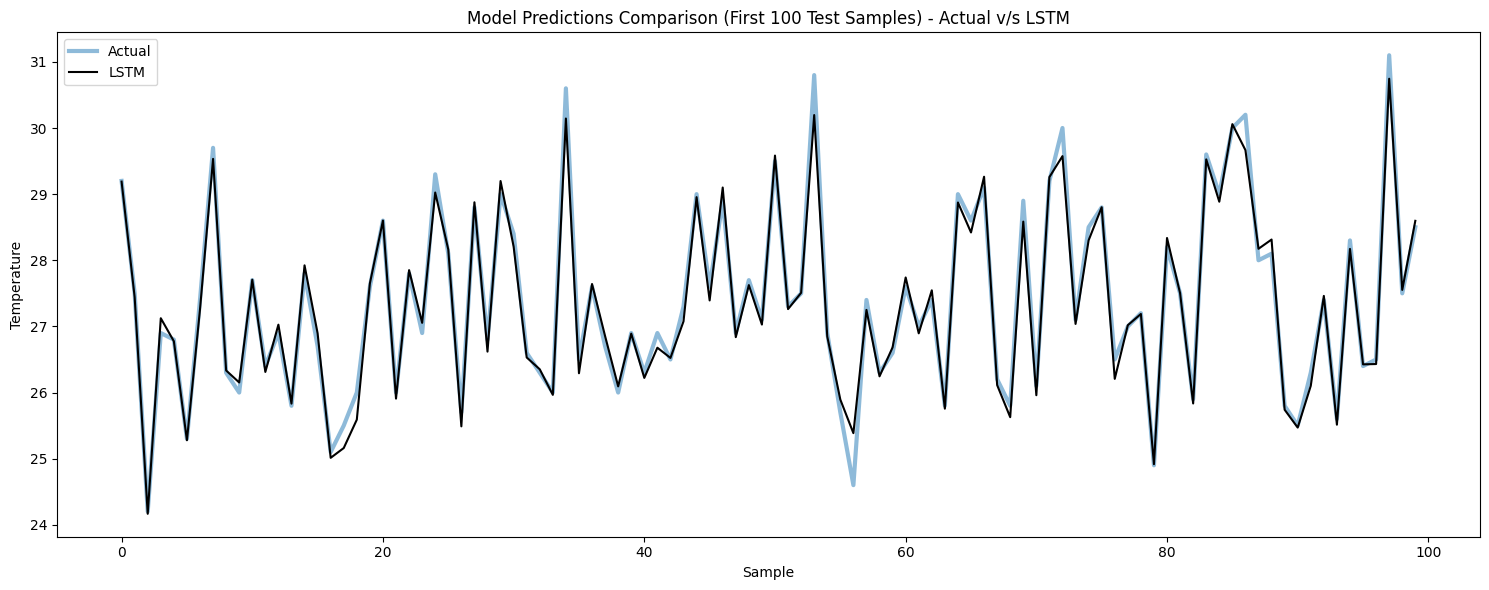

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Actual',linewidth=3,alpha=0.5)
plt.plot(lstm_pred[:100], label='LSTM',c='k')
plt.title('Model Predictions Comparison (First 100 Test Samples) - Actual v/s LSTM')
plt.xlabel('Sample')
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()

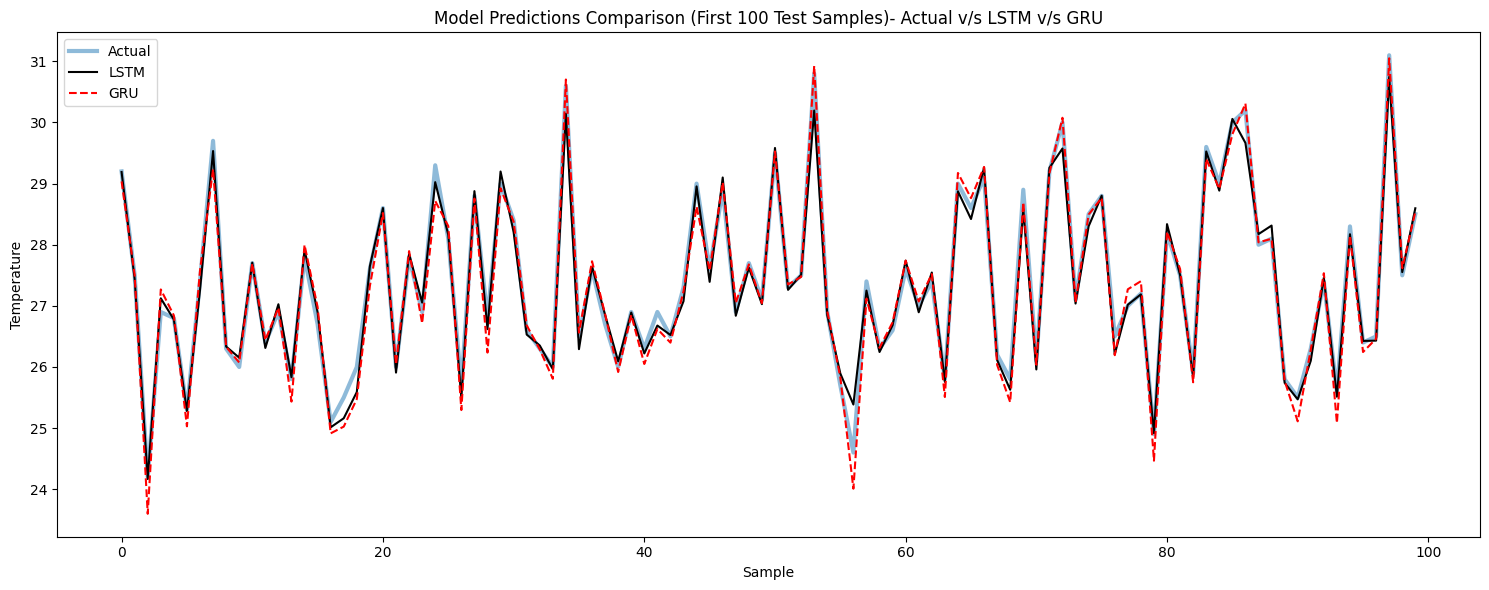

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values[:100], label='Actual',linewidth=3,alpha=0.5)
plt.plot(lstm_pred[:100], label='LSTM',c='k')
plt.plot(gru_pred[:100], label='GRU', linestyle='--', color='red')
plt.title('Model Predictions Comparison (First 100 Test Samples)- Actual v/s LSTM v/s GRU')
plt.xlabel('Sample')
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()

<h1>Future Predictions:</h1>

<h2>Preparing future data i.e March 2025</h2>
 <h3>Based on the March 2024 data, we will be providing ranges for <code>np.random.uniform()</code> for the features in the dataframe

In [ ]:
future_dates = pd.date_range(start='2025-01-01', periods=3650, freq='D')
future_data = pd.DataFrame({
    'datetime': future_dates,
    'tempmax': np.random.uniform(23.7, 38.7, 3650),
    'tempmin': np.random.uniform(18.4, 29.1, 3650),
    'temp': np.random.uniform(25.0, 35.0, 3650),
    'feelslikemax': np.random.uniform(25.0, 40.0, 3650),
    'feelslikemin': np.random.uniform(20.0, 30.0, 3650),
    'feelslike': np.random.uniform(25.0, 35.0, 3650),
    'dew': np.random.uniform(15.0, 25.0, 3650),
    'humidity': np.random.uniform(40, 95, 3650),
    'precip': np.random.uniform(0, 50, 3650),
    'precipprob': np.random.uniform(0, 100, 3650),
    'precipcover': np.random.uniform(0, 100, 3650),
    'solarradiation': np.random.uniform(0, 8.5, 3650),
    'solarenergy': np.random.uniform(0, 25.0, 3650),
    'uvindex': np.random.uniform(0, 10, 3650),
    'cloudcover': np.random.uniform(0, 100, 3650),
    'visibility': np.random.uniform(0, 10, 3650),
    'windspeed': np.random.uniform(0, 30, 3650),
    'winddir': np.random.uniform(0, 360, 3650),
    'sealevelpressure': np.random.uniform(1000, 1020, 3650)
})

In [ ]:
# Set datetime as index for our dataframe
future_data.set_index('datetime', inplace=True)

# Ensuring the columns are in the same order as the training data
future_data = future_data[df1.columns]

<h2>Making Predictions for the future dataset

In [ ]:
# 1. Get the EXACT columns used in training (including temp)
training_columns = df1.columns.tolist()

# 2. Prepare future data with ALL original columnsand  Fill temp with 0 the dummy value - won't affect predictions
future_data['temp'] = 0
future_data = future_data[training_columns]

# 3. Scale ALL features (including temp)
future_data_scaled = scaler.fit_transform(future_data)

# 4. Get predictions
future_xgb_pred = xgb_model.predict(future_data_scaled).flatten()  # Shape: (30,)
future_lgb_pred = lgb_model.predict(future_data_scaled).flatten()  # Shape: (30,)
future_tabnet_pred = tabnet_model.predict(future_data_scaled).flatten()

# 5. Create ensemble
future_predictions = 0.5 * future_xgb_pred + 0.3 * future_lgb_pred + 0.2 * future_tabnet_pred

# 6. Store results (and clean up dummy temp)
future_data['predicted_temp'] = future_predictions
future_data = future_data.drop(columns=['temp'])  # Remove dummy column

print("\nPredicted temperatures for 10 years:")
# 7. Calculate yearly averages
yearly_averages = future_data.resample('Y')['predicted_temp'].mean()

# 8. Print yearly averages
print("\nYearly Average Temperatures:")
for year, avg_temp in yearly_averages.items():
    print(f"{year.year}: {avg_temp:.2f}°C")

# 9. Print overall 10-year average
print(f"\nOverall 10-year average temperature: {yearly_averages.mean():.2f}°C")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9

Predicted temperatures for 10 years:

Yearly Average Temperatures:
2025: 27.24°C
2026: 27.22°C
2027: 27.24°C
2028: 27.24°C
2029: 27.23°C
2030: 27.23°C
2031: 27.21°C
2032: 27.23°C
2033: 27.24°C
2034: 27.21°C

Overall 10-year average temperature: 27.23°C


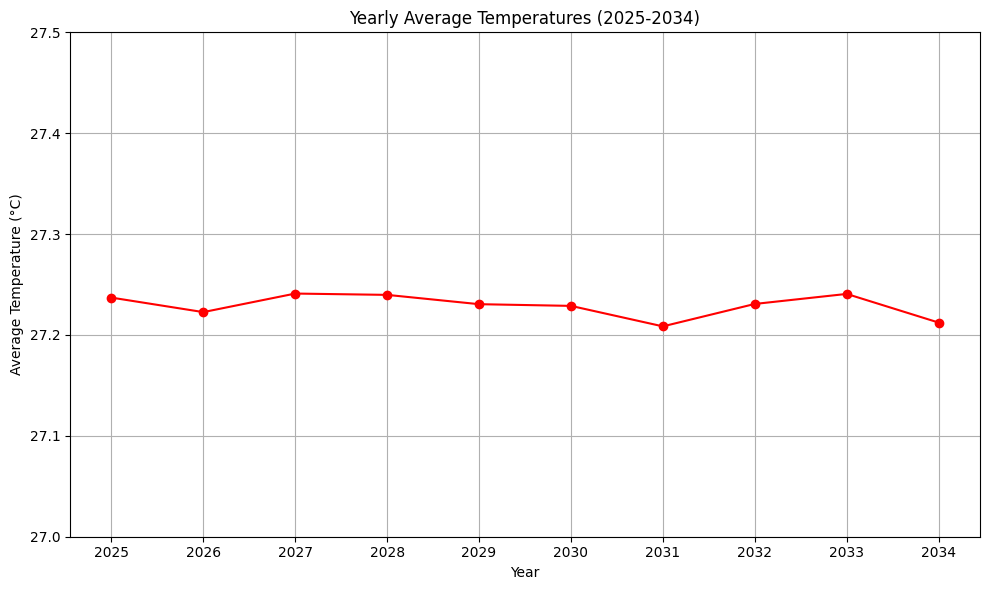

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_averages.index.year, yearly_averages.values, marker='o', linestyle='-', color='red')
plt.title('Yearly Average Temperatures (2025-2034)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.ylim(27,27.5)
plt.xticks(yearly_averages.index.year)
plt.tight_layout()